In [1]:
import os

import pyro
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

import matplotlib.pyplot as plt
from PIL import Image

from RAVDESS_dataset_util import *
from EmoClassCNN import *
from MVAE import *

torch.set_default_dtype(torch.float64)

pyro.enable_validation(False)

In [2]:
folder_path = '/home/studenti/ballerini/datasets/RAVDESS_frames_ds'

In [3]:
img_size = 64
batch_size = 16
num_classes = len(emocat)

face_dataset = FaceEmotionDataset(root_dir=folder_path,
                                    transform=transforms.Compose([
                                        Rescale(img_size), 
                                        CenterCrop(img_size), 
                                        ToTensor()
                                    ]))        

trainingset_len = len(face_dataset) // 100 * 90
testset_len = len(face_dataset) - trainingset_len

print('training set size: ', trainingset_len)
print('test set size: ', testset_len)

train_set, test_set = torch.utils.data.random_split(face_dataset, 
                                                    [trainingset_len, testset_len], 
                                                    #generator=torch.Generator().manual_seed(42)
                                                   )
                                                    
                                                    
dataset_loader = DataLoader(train_set, batch_size=batch_size,
                        shuffle=True, num_workers=20)

testset_loader = DataLoader(train_set, batch_size=batch_size,
                        shuffle=True, num_workers=20)

print(len(face_dataset))

training set size:  8820
test set size:  1047
9867


(64, 64, 3)


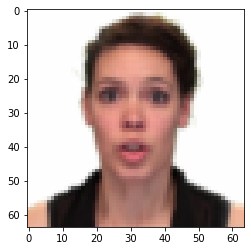

In [4]:
img = np.array(next(iter(face_dataset))['image']).transpose((1, 2, 0))
print(img.shape)
plt.imshow(img)

In [5]:
def emotion_rating_conversion(cat):
    ratings = torch.zeros(num_classes)
    ratings[cat] = 1
    return ratings

In [6]:
import gc

gc.collect()
torch.cuda.empty_cache()
pyro.clear_param_store()

class Args:
    
    learning_rate = 1e-5
    weight_decay = 1e-6
    num_epochs = 100
    z_dim = 64
    ch_size = 64
    
    emotion_dim = num_classes
    img_size = img_size
    seed = 30
    cuda = True
    
args = Args()

# setup the optimizer
adam_args = {"lr": args.learning_rate, "weight_decay":args.weight_decay}
optimizer = Adam(adam_args)

# setup the VAE
mvae = MVAE(z_dim=args.z_dim, 
            emotion_dim = args.emotion_dim,
            img_size=args.img_size, 
            use_cuda=args.cuda,
            ch_size=args.ch_size)

# setup the inference algorithm
svi = SVI(mvae.model, mvae.guide, optimizer, loss=Trace_ELBO())

In [16]:
loadmodel = False
trainmodel = True


In [8]:
if loadmodel:
    pyro.get_param_store().load('trained_models/mvae_pretrained-02.save')
    pyro.module("mvae", mvae, update_module_params=True)

  1%|▎                         | 1/100 [01:29<2:27:25, 89.35s/it]

average training loss: 53564.3284


  2%|▌                         | 2/100 [03:01<2:28:23, 90.85s/it]

average training loss: 63526.7842


  3%|▊                         | 3/100 [04:32<2:27:14, 91.08s/it]

average training loss: 55888.8198


  4%|█                         | 4/100 [06:05<2:26:58, 91.86s/it]

average training loss: 54076.2172


  5%|█▎                        | 5/100 [07:53<2:34:34, 97.62s/it]

average training loss: 56021.1075


  6%|█▌                        | 6/100 [09:29<2:32:03, 97.06s/it]

average training loss: 57846.7951


  7%|█▊                        | 7/100 [11:04<2:29:10, 96.24s/it]

average training loss: 50025.3270


  8%|██                        | 8/100 [12:47<2:31:02, 98.50s/it]

average training loss: 53031.6412


  9%|██▎                       | 9/100 [14:27<2:29:59, 98.90s/it]

average training loss: 53329.4572


 10%|██▌                      | 10/100 [16:00<2:25:47, 97.19s/it]

average training loss: 54293.2006


 11%|██▊                      | 11/100 [17:31<2:21:14, 95.22s/it]

average training loss: 75030.4961


 12%|███                      | 12/100 [19:03<2:18:07, 94.17s/it]

average training loss: 58731.3792


 13%|███▎                     | 13/100 [20:41<2:18:17, 95.38s/it]

average training loss: 59842.3877


 14%|███▌                     | 14/100 [22:19<2:17:50, 96.17s/it]

average training loss: 56051.3505


 15%|███▊                     | 15/100 [23:53<2:15:31, 95.66s/it]

average training loss: 54164.6248


 16%|████                     | 16/100 [25:32<2:15:18, 96.64s/it]

average training loss: 61169.7158


 17%|████▎                    | 17/100 [27:13<2:15:39, 98.06s/it]

average training loss: 61873.4640


 18%|████▌                    | 18/100 [28:45<2:11:18, 96.08s/it]

average training loss: 62729.8718


 19%|████▊                    | 19/100 [30:21<2:09:53, 96.21s/it]

average training loss: 65167.5713


 20%|█████                    | 20/100 [31:56<2:07:30, 95.64s/it]

average training loss: 59728.6720


 21%|█████▎                   | 21/100 [33:18<2:00:49, 91.76s/it]

average training loss: 54159.4882


 22%|█████▌                   | 22/100 [34:41<1:55:39, 88.97s/it]

average training loss: 51091.7862


 23%|█████▊                   | 23/100 [36:04<1:51:43, 87.06s/it]

average training loss: 80093.1215


 24%|██████                   | 24/100 [37:24<1:47:50, 85.14s/it]

average training loss: 62655.0195


 25%|██████▎                  | 25/100 [38:44<1:44:24, 83.53s/it]

average training loss: 60175.2265


 26%|██████▌                  | 26/100 [40:04<1:41:53, 82.61s/it]

average training loss: 56191.7857


 27%|██████▊                  | 27/100 [41:25<1:39:51, 82.07s/it]

average training loss: 53438.4723


 28%|███████                  | 28/100 [42:45<1:37:46, 81.48s/it]

average training loss: 47999.4322


 29%|███████▏                 | 29/100 [44:06<1:36:05, 81.21s/it]

average training loss: 57095.6541


 30%|███████▌                 | 30/100 [45:27<1:34:39, 81.14s/it]

average training loss: 53599.0239


 31%|███████▊                 | 31/100 [47:32<1:48:20, 94.21s/it]

average training loss: 51137.7323


 32%|███████▋                | 32/100 [49:39<1:58:00, 104.12s/it]

average training loss: 56969.5650


 33%|███████▉                | 33/100 [51:47<2:04:22, 111.38s/it]

average training loss: 53960.2127


 34%|████████▏               | 34/100 [53:55<2:07:49, 116.21s/it]

average training loss: 51048.5774


 35%|████████▍               | 35/100 [56:03<2:09:49, 119.84s/it]

average training loss: 54071.4503


 36%|████████▋               | 36/100 [58:11<2:10:18, 122.17s/it]

average training loss: 56556.2351


 37%|████████▏             | 37/100 [1:00:20<2:10:28, 124.27s/it]

average training loss: 66008.1861


 38%|████████▎             | 38/100 [1:02:28<2:09:40, 125.49s/it]

average training loss: 67634.5930


 39%|████████▌             | 39/100 [1:04:38<2:08:48, 126.69s/it]

average training loss: 56850.5663


 40%|████████▊             | 40/100 [1:06:45<2:07:00, 127.00s/it]

average training loss: 58598.3302


 41%|█████████             | 41/100 [1:08:54<2:05:20, 127.46s/it]

average training loss: 54521.3800


 42%|█████████▏            | 42/100 [1:11:02<2:03:21, 127.61s/it]

average training loss: 51725.7143


 43%|█████████▍            | 43/100 [1:13:10<2:01:30, 127.91s/it]

average training loss: 54759.5596


 44%|█████████▋            | 44/100 [1:15:19<1:59:30, 128.04s/it]

average training loss: 77501.0376


 45%|█████████▉            | 45/100 [1:17:28<1:57:34, 128.27s/it]

average training loss: 55908.6246


 46%|██████████            | 46/100 [1:19:36<1:55:22, 128.20s/it]

average training loss: 68541.0536


 47%|██████████▎           | 47/100 [1:21:43<1:53:00, 127.94s/it]

average training loss: 53239.1421


 48%|██████████▌           | 48/100 [1:23:52<1:51:03, 128.15s/it]

average training loss: 55076.1440


 49%|██████████▊           | 49/100 [1:26:00<1:49:00, 128.24s/it]

average training loss: 55326.8484


 50%|███████████           | 50/100 [1:28:09<1:47:05, 128.51s/it]

average training loss: 56282.4146


 51%|███████████▏          | 51/100 [1:30:16<1:44:39, 128.15s/it]

average training loss: 49729.5434


 52%|███████████▍          | 52/100 [1:32:23<1:42:14, 127.79s/it]

average training loss: 52899.9914


 53%|███████████▋          | 53/100 [1:34:31<1:40:08, 127.84s/it]

average training loss: 47153.9546


 54%|███████████▉          | 54/100 [1:36:37<1:37:32, 127.23s/it]

average training loss: 47434.5951


 55%|████████████          | 55/100 [1:38:46<1:35:41, 127.59s/it]

average training loss: 45568.7828


 56%|████████████▎         | 56/100 [1:40:54<1:33:42, 127.79s/it]

average training loss: 46078.9206


 57%|████████████▌         | 57/100 [1:43:02<1:31:35, 127.80s/it]

average training loss: 47721.4533


 58%|████████████▊         | 58/100 [1:45:11<1:29:47, 128.28s/it]

average training loss: 49301.8474


 59%|████████████▉         | 59/100 [1:47:17<1:27:08, 127.52s/it]

average training loss: 49143.0956


 60%|█████████████▏        | 60/100 [1:49:26<1:25:19, 127.99s/it]

average training loss: 49168.8213


 61%|█████████████▍        | 61/100 [1:51:33<1:22:57, 127.63s/it]

average training loss: 47118.6180


 62%|█████████████▋        | 62/100 [1:53:38<1:20:23, 126.94s/it]

average training loss: 44180.9903


 63%|█████████████▊        | 63/100 [1:55:43<1:17:49, 126.20s/it]

average training loss: 47056.0711


 64%|██████████████        | 64/100 [1:57:51<1:16:06, 126.85s/it]

average training loss: 58318.7557


 65%|██████████████▎       | 65/100 [1:59:59<1:14:09, 127.12s/it]

average training loss: 44617.5522


 66%|██████████████▌       | 66/100 [2:02:08<1:12:21, 127.70s/it]

average training loss: 51448.1131


 67%|██████████████▋       | 67/100 [2:04:16<1:10:18, 127.84s/it]

average training loss: 49701.6599


 68%|██████████████▉       | 68/100 [2:06:25<1:08:19, 128.12s/it]

average training loss: 48084.3664


 69%|███████████████▏      | 69/100 [2:08:30<1:05:43, 127.20s/it]

average training loss: 53216.7871


 70%|███████████████▍      | 70/100 [2:10:35<1:03:23, 126.78s/it]

average training loss: 49539.1104


 71%|███████████████▌      | 71/100 [2:12:44<1:01:35, 127.44s/it]

average training loss: 47216.3659


 72%|█████████████████▎      | 72/100 [2:14:46<58:38, 125.66s/it]

average training loss: 46545.0699


 73%|█████████████████▌      | 73/100 [2:16:53<56:44, 126.10s/it]

average training loss: 43278.8578


 74%|█████████████████▊      | 74/100 [2:18:58<54:27, 125.68s/it]

average training loss: 48123.3214


 75%|██████████████████      | 75/100 [2:20:44<49:58, 119.95s/it]

average training loss: 48421.0505


 76%|██████████████████▏     | 76/100 [2:22:49<48:31, 121.30s/it]

average training loss: 44971.6387


 77%|██████████████████▍     | 77/100 [2:24:57<47:14, 123.24s/it]

average training loss: 51937.3010


 78%|██████████████████▋     | 78/100 [2:27:05<45:44, 124.75s/it]

average training loss: 55745.5751


 79%|██████████████████▉     | 79/100 [2:28:41<40:39, 116.17s/it]

average training loss: 48745.5898


 80%|███████████████████▏    | 80/100 [2:30:40<38:59, 116.98s/it]

average training loss: 42856.4094


 81%|███████████████████▍    | 81/100 [2:32:47<37:59, 119.97s/it]

average training loss: 47917.9826


 82%|███████████████████▋    | 82/100 [2:34:55<36:43, 122.39s/it]

average training loss: 44516.9895


 83%|███████████████████▉    | 83/100 [2:37:03<35:10, 124.17s/it]

average training loss: 43951.5221


 84%|████████████████████▏   | 84/100 [2:38:42<31:04, 116.50s/it]

average training loss: 51838.3635


 85%|████████████████████▍   | 85/100 [2:40:20<27:46, 111.07s/it]

average training loss: 52830.0380


 86%|████████████████████▋   | 86/100 [2:42:21<26:34, 113.86s/it]

average training loss: 50597.6403


 87%|████████████████████▉   | 87/100 [2:44:27<25:29, 117.66s/it]

average training loss: 43945.4224


 88%|█████████████████████   | 88/100 [2:46:34<24:05, 120.42s/it]

average training loss: 46025.6222


 89%|█████████████████████▎  | 89/100 [2:48:42<22:30, 122.78s/it]

average training loss: 41911.5541


 90%|█████████████████████▌  | 90/100 [2:50:50<20:43, 124.38s/it]

average training loss: 44090.3141


 91%|█████████████████████▊  | 91/100 [2:52:58<18:49, 125.48s/it]

average training loss: 45629.1356


 92%|██████████████████████  | 92/100 [2:54:58<16:29, 123.71s/it]

average training loss: 46313.8644


 93%|██████████████████████▎ | 93/100 [2:56:40<13:41, 117.32s/it]

average training loss: 45801.4759


 94%|██████████████████████▌ | 94/100 [2:58:19<11:10, 111.69s/it]

average training loss: 46769.7943


 95%|██████████████████████▊ | 95/100 [3:00:02<09:05, 109.01s/it]

average training loss: 45173.4301


 96%|███████████████████████ | 96/100 [3:01:42<07:06, 106.50s/it]

average training loss: 44108.5059


 97%|███████████████████████▎| 97/100 [3:03:29<05:19, 106.57s/it]

average training loss: 47551.5957


 98%|███████████████████████▌| 98/100 [3:05:20<03:35, 107.84s/it]

average training loss: 47829.8555


 99%|███████████████████████▊| 99/100 [3:07:11<01:48, 108.81s/it]

average training loss: 43583.6915


100%|███████████████████████| 100/100 [3:09:01<00:00, 113.41s/it]

average training loss: 41450.6528
41450.65282237355


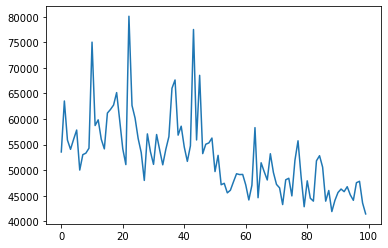

In [17]:
from tqdm import tqdm
model_params = pyro.get_param_store()
if trainmodel:
    best_loss = -1
    train_elbo = []
    test_elbo = []
    # training loop
    for epoch in tqdm(range(args.num_epochs)):
        epoch_loss = 0.
        for batch_num, sample in enumerate(dataset_loader):

            faces, emotions = sample['image'], sample['cat']
            emotions = torch.stack([emotion_rating_conversion(emo) for emo in emotions])

            # if on GPU put mini-batch into CUDA memory
            if args.cuda:
                faces, emotions = faces.cuda(), emotions.cuda()

            # do ELBO gradient and accumulate loss
            epoch_loss += svi.step(images=faces, emotions=emotions)
            epoch_loss += svi.step(images=faces, emotions=None)
            epoch_loss += svi.step(images=None, emotions=emotions)

        # report training diagnostics
        normalizer_train = len(dataset_loader)
        total_epoch_loss_train = epoch_loss / normalizer_train
        train_elbo.append(total_epoch_loss_train)
        
        if best_loss == -1:
            best_loss = total_epoch_loss_train
        else:
            if best_loss > total_epoch_loss_train:
                best_loss = total_epoch_loss_train
                model_params = pyro.get_param_store()

        # report training diagnostics
        print("average training loss: %.4f" % (total_epoch_loss_train))
    plt.plot(train_elbo)
    print(best_loss)

In [25]:
savemodel = True

if savemodel:
    if not os.path.exists('./trained_models'):
      os.mkdir('./trained_models')
    model_params.save('trained_models/mvae_pretrained-02.save')

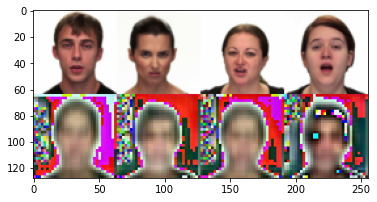

In [22]:
num_samples = 4
input_array = np.zeros(shape=(img_size, 1, 3), dtype="uint8")
reconstructed_array = np.zeros(shape=(img_size, 1, 3), dtype="uint8")
    
# pick NUM_SAMPLES random test images from the first mini-batch and
# visualize how well we're reconstructing them

faces = next(iter(dataset_loader))['image']
if args.cuda:
    faces = faces.cuda()

reco_indices = np.random.randint(0, faces.size(0), num_samples)
for index in reco_indices:
    input_img = faces[index, :]
    # storing the input image
    input_img_display = np.array(input_img.cpu()*255., dtype='uint8')
    input_img_display = input_img_display.transpose((1, 2, 0))
    input_array = np.concatenate((input_array, input_img_display), axis=1)

    # generating the reconstructed image and adding to array
    input_img = input_img.view(1, 3, img_size, img_size)
    reconstructed_img = mvae.reconstruct_img(input_img)
    reconstructed_img = reconstructed_img.cpu().view(3, img_size, img_size).detach().numpy()
    reconstructed_img = np.array(reconstructed_img*255., dtype='uint8')
    reconstructed_img = reconstructed_img.transpose((1, 2, 0))
    reconstructed_array = np.concatenate((reconstructed_array, reconstructed_img), axis=1)


from PIL import Image
# remove first, blank column, and concatenate
input_array = input_array[:,1:,:]
reconstructed_array = reconstructed_array[:,1:,:]
display_array = np.concatenate((input_array, reconstructed_array), axis=0)
plt.imshow(display_array)

In [23]:
def testBatch(model, dataset_loader, categories):
    sample = next(iter(dataset_loader))
    images = sample['image']
    labels = sample['cat']
    if args.cuda:
        images = images.cuda()
        labels = labels.cuda()

    #imageshow(torchvision.utils.make_grid(images))
    batch_size = len(labels)
       
    # img -> z -> img
    predicted = []
    for image in images:
        output = model.emotion_classifier(input_img)
        predicted.append(torch.argmax(output, 1))
    
    # Show the real labels on the screen 
    #print('Real labels:', '\t'.join('%5s' % categories[labels[j].item()] for j in range(batch_size-8)))
    # Let's show the predicted labels on the screen to compare with the real ones
    #print('Predicted:', '\t'.join('%5s' % categories[predicted[j].item()] for j in range(batch_size-8)))
    
    # img -> z -> emo
    acc = 0
    for i in range(len(labels)):
        if categories[labels[i].item()] == categories[predicted[i].item()]:
            acc += 1
    acc = acc / len(labels)
    print ('img -> z -> emo accuracy: ', acc)
    
    
    # emo -> z -Z emo
    acc = 0
    emotions = torch.stack([emotion_rating_conversion(emo) for emo in labels]).cuda()
    z = model.emoToZ(emotions)
    pred_emo = torch.argmax(model.zToEmo(z), 1)
    
    for i in range(batch_size):
        if labels[i] == pred_emo[i]:
            acc+=1
    acc = acc / len(labels)
    print ('emo -> z -> emo accuracy: ', acc)

In [24]:
testBatch(mvae, testset_loader, emocat)

img -> z -> emo accuracy:  0.125
emo -> z -> emo accuracy:  0.6875
